In [ ]:
# Import all library that we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [ ]:
# Read the dataset on color blindness from the specified URL and store it in a Pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/FajarDwi2103/EyeCare/main/Dataset%20Buta%20Warna/Dataset%20Color%20Blind.csv")
df

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10,Kategori
0,0,0,0,0,0,0,0,0,0,0,Buta Warna Total
1,0,0,0,0,0,0,0,0,0,1,Buta Warna Total
2,0,0,0,0,0,0,0,0,1,0,Buta Warna Total
3,0,0,0,0,0,0,0,0,1,1,Buta Warna Total
4,0,0,0,0,0,0,0,1,0,0,Buta Warna Total
...,...,...,...,...,...,...,...,...,...,...,...
1019,1,1,1,1,1,1,1,0,1,1,Tidak Buta Warna
1020,1,1,1,1,1,1,1,1,0,0,Tidak Buta Warna
1021,1,1,1,1,1,1,1,1,0,1,Tidak Buta Warna
1022,1,1,1,1,1,1,1,1,1,0,Tidak Buta Warna


In [ ]:
# Creating feature matrix X by dropping the 'Kategori' column, and setting the target variable y to 'Kategori'
X = df.drop(['Kategori'], axis=1)
y = df['Kategori']

In [ ]:
# Mapping the categories in the 'Kategori' column to numerical values using category_mapping
category_mapping = {'Buta Warna Total': 0, 'Buta Warna Parsial': 1, 'Tidak Buta Warna': 2}
y = y.map(category_mapping)

In [ ]:
# One-hot encoding the target variable y using to_categorical with 3 classes
y_one_hot = to_categorical(y, num_classes=3)

In [ ]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=0)

In [ ]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (716, 10)
y_train: (716, 3)
X_test: (308, 10)
y_test: (308, 3)


In [ ]:
# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 outputs for 3 classes

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/25
23/23 [==============================] - 4s 58ms/step - loss: 0.8999 - accuracy: 0.5712 - val_loss: 0.8996 - val_accuracy: 0.5617
Epoch 2/25
23/23 [==============================] - 0s 17ms/step - loss: 0.7952 - accuracy: 0.5726 - val_loss: 0.8875 - val_accuracy: 0.5682
Epoch 3/25
23/23 [==============================] - 0s 18ms/step - loss: 0.7422 - accuracy: 0.6131 - val_loss: 0.8383 - val_accuracy: 0.6266
Epoch 4/25
23/23 [==============================] - 0s 19ms/step - loss: 0.6813 - accuracy: 0.7291 - val_loss: 0.7799 - val_accuracy: 0.7468
Epoch 5/25
23/23 [==============================] - 0s 11ms/step - loss: 0.6131 - accuracy: 0.7891 - val_loss: 0.7048 - val_accuracy: 0.8019
Epoch 6/25
23/23 [==============================] - 0s 11ms/step - loss: 0.5343 - accuracy: 0.8771 - val_loss: 0.6324 - val_accuracy: 0.7792
Epoch 7/25
23/23 [==============================] - 0s 9ms/step - loss: 0.4631 - accuracy: 0.8841 - val_loss: 0.5502 - val_accuracy: 0.8149
Epoch 8/25
23/

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

10/10 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       109
           1       0.99      1.00      0.99       173
           2       1.00      0.96      0.98        26

    accuracy                           0.99       308
   macro avg       1.00      0.98      0.99       308
weighted avg       0.99      0.99      0.99       308



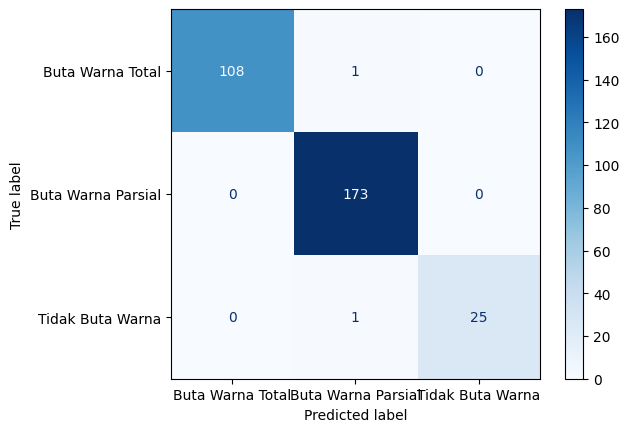

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Buta Warna Total', 'Buta Warna Parsial', 'Tidak Buta Warna'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [ ]:
testdata = pd.read_csv("https://raw.githubusercontent.com/FajarDwi2103/EyeCare/main/Dataset%20Buta%20Warna/TEST%20COLOR.csv")
testdata

,Pert.1,Pert.2,Pert.3,Pert.4,Pert.5,Pert.6,Pert.7,Pert.8,Pert.9,Pert.10
0,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,1,0,1
2,0,0,1,0,1,1,0,0,1,0
3,0,0,1,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,0,0
5,0,0,1,0,1,1,0,1,0,1
6,1,1,1,1,1,1,1,0,1,1
7,1,1,1,1,1,1,1,1,0,0
8,0,0,0,0,0,0,0,0,1,1
9,1,1,1,1,1,1,0,1,1,1


In [ ]:
predictions = model.predict(testdata)
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Analyze predictions
print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 0s 60ms/step
Predicted Labels: [0 2 0 1 0 1 2 2 0 2]


If the Predictions rigth it should be [0 2 0 1 0 1 2 2 0 2]

In [ ]:
# Save the entire model to a file
model.save("Color_Blind_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
